In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('/content/Preprocessed_DonorsChoose_dataset.csv')

In [3]:
data.head()

,id,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,cleaned_titles,cleaned_essays,cleaned_summary,isdigit_summary
0,p253737,mrs,in,grades_prek_2,literacy_language,esl_literacy,0,0,154.60,23,educational support english learners home,students english learners working english seco...,students_need_opportunities_practice_beginning...,0
1,p258326,mr,fl,grades_6_8,history_civics_health_sports,civics_government_teamsports,7,1,299.00,1,wanted projector hungry learners,students arrive school eager learn polite gene...,students_need_projector_help_viewing_education...,0
2,p182444,ms,az,grades_6_8,health_sports,health_wellness_teamsports,1,0,516.85,22,soccer equipment awesome middle school students,true champions not always ones win guts mia ha...,students_need_shine_guards_athletic_socks_socc...,0
3,p246581,mrs,ky,grades_prek_2,literacy_language_math_science,literacy_mathematics,4,1,232.90,4,techie kindergarteners,work unique school filled esl english second l...,students_need_engage_reading_math_way_inspire_...,0
4,p104768,mrs,tx,grades_prek_2,math_science,mathematics,1,1,67.98,4,interactive math tools,second grade classroom next year made around 2...,students_need_hands_practice_mathematics_fun_p...,0


In [4]:
print(data.columns)

Index(['id', 'teacher_prefix', 'school_state', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'cleaned_titles', 'cleaned_essays',
       'cleaned_summary', 'isdigit_summary'],
      dtype='object')


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109248 entries, 0 to 109247
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   id                                            109248 non-null  object 
 1   teacher_prefix                                109248 non-null  object 
 2   school_state                                  109248 non-null  object 
 3   project_grade_category                        109248 non-null  object 
 4   project_subject_categories                    109248 non-null  object 
 5   project_subject_subcategories                 109248 non-null  object 
 6   teacher_number_of_previously_posted_projects  109248 non-null  int64  
 7   project_is_approved                           109248 non-null  int64  
 8   price                                         109248 non-null  float64
 9   quantity                                      10

In [6]:
data.describe()

,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,isdigit_summary
count,109248.000000,109248.000000,109248.000000,109248.000000,109248.000000
mean,11.153165,0.848583,298.119343,16.965610,0.144222
std,27.777154,0.358456,367.498030,26.182942,0.351317
min,0.000000,0.000000,0.660000,1.000000,0.000000
25%,0.000000,1.000000,104.310000,4.000000,0.000000
50%,2.000000,1.000000,206.220000,9.000000,0.000000
75%,9.000000,1.000000,379.000000,21.000000,0.000000
max,451.000000,1.000000,9999.000000,930.000000,1.000000


In [5]:
target_column = 'project_is_approved'

print(f"Class counts for target variable :")
print(data[target_column].value_counts())

print(f"\nClass balance :")
print(data[target_column].value_counts(normalize=True) * 100)

Class counts for target variable :
project_is_approved
1    92706
0    16542
Name: count, dtype: int64

Class balance :
project_is_approved
1    84.858304
0    15.141696
Name: proportion, dtype: float64


In [6]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
import re
stopwords = nltk.corpus.stopwords.words('english')

def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = ''.join([word for word in text.split() if word not in stopwords])
    return text

data['project_essay_clean'] = data['cleaned_essays'].apply(clean_text)
print(data[['cleaned_essays', 'project_essay_clean']].head())


                                      cleaned_essays  \
0  students english learners working english seco...   
1  students arrive school eager learn polite gene...   
2  true champions not always ones win guts mia ha...   
3  work unique school filled esl english second l...   
4  second grade classroom next year made around 2...   

                                 project_essay_clean  
0  studentsenglishlearnersworkingenglishsecondthi...  
1  studentsarriveschooleagerlearnpolitegenerousst...  
2  truechampionsalwaysoneswingutsmiahammquotebest...  
3  workuniqueschoolfilledeslenglishsecondlanguage...  
4  secondgradeclassroomnextyearmadearound25kidsma...  


In [8]:
from nltk.tokenize import word_tokenize

text = data['project_essay_clean'][0]
tokens = word_tokenize(text)
print(tokens)

data['essays_token'] = data['project_essay_clean'].apply(word_tokenize)
print(data[['project_essay_clean','essays_token']].head())

['studentsenglishlearnersworkingenglishsecondthirdlanguagesmeltingpotrefugeesimmigrantsnativebornamericansbringinggiftlanguageschool24languagesrepresentedenglishlearnerprogramstudentseverylevelmasteryalso40countriesrepresentedfamilieswithinschoolstudentbringswealthknowledgeexperiencesusopeneyesnewculturesbeliefsrespectlimitslanguagelimitsworldludwigwittgensteinenglishlearnerstrongsupportsystemhomebegsresourcesmanytimesparentslearningreadspeakenglishalongsidechildrensometimescreatesbarriersparentsablehelpchildlearnphoneticsletterrecognitionreadingskillsprovidingdvdplayersstudentsablecontinuemasteryenglishlanguageevenonehomeableassistfamiliesstudentswithinlevel1proficiencystatusofferedpartprogrameducationalvideosspeciallychosenenglishlearnerteachersenthomeregularlywatchvideoshelpchilddevelopearlyreadingskillsparentsaccessdvdplayeropportunitycheckdvdplayeruseyearplanusevideoseducationaldvdyearscomeelstudents']
                                 project_essay_clean  \
0  studentsenglishlearn

In [9]:

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens
data['lemmatized_essays'] = data['project_essay_clean'].apply(lemmatize_text)
print(data[['project_essay_clean', 'lemmatized_essays']].head())

                                 project_essay_clean  \
0  studentsenglishlearnersworkingenglishsecondthi...   
1  studentsarriveschooleagerlearnpolitegenerousst...   
2  truechampionsalwaysoneswingutsmiahammquotebest...   
3  workuniqueschoolfilledeslenglishsecondlanguage...   
4  secondgradeclassroomnextyearmadearound25kidsma...   

                                   lemmatized_essays  
0  [studentsenglishlearnersworkingenglishsecondth...  
1  [studentsarriveschooleagerlearnpolitegenerouss...  
2  [truechampionsalwaysoneswingutsmiahammquotebes...  
3  [workuniqueschoolfilledeslenglishsecondlanguag...  
4  [secondgradeclassroomnextyearmadearound25kidsm...  


In [10]:
from collections import Counter

all_words = ''.join(data['project_essay_clean'])
word_counts = Counter(all_words.split())

lower_freq_word = set([word for word, count in word_counts.items() if count <= 5])
def remove_lower_freq_words(text):
  tokens = word_tokenize(text)
  tokens = [word for word in tokens if word not in lower_freq_word]
  return ' '.join(tokens)

data['filtered_essays'] = data['project_essay_clean'].apply(remove_lower_freq_words)
print(data[['project_essay_clean', 'filtered_essays']].head())


                                 project_essay_clean  \
0  studentsenglishlearnersworkingenglishsecondthi...   
1  studentsarriveschooleagerlearnpolitegenerousst...   
2  truechampionsalwaysoneswingutsmiahammquotebest...   
3  workuniqueschoolfilledeslenglishsecondlanguage...   
4  secondgradeclassroomnextyearmadearound25kidsma...   

                                     filtered_essays  
0  studentsenglishlearnersworkingenglishsecondthi...  
1  studentsarriveschooleagerlearnpolitegenerousst...  
2  truechampionsalwaysoneswingutsmiahammquotebest...  
3  workuniqueschoolfilledeslenglishsecondlanguage...  
4  secondgradeclassroomnextyearmadearound25kidsma...  


##3. Embedding Approaches

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

texts = data['filtered_essays']
vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=5000)
X_tfidf = vectorizer.fit_transform(texts)

print("TF-IDF shape:", X_tfidf.shape)

TF-IDF shape: (109248, 5000)


In [12]:
#Pre-trained Word2Vec
!pip install gensim

import gensim.downloader as api

word2vec_model = api.load('word2vec-google-news-300')

def document_vector(doc):
    tokens = doc.split()
    vectors = [word2vec_model[word] for word in tokens if word in word2vec_model]
    if len(vectors) == 0:
        return np.zeros(300)
    return np.mean(vectors, axis=0)

X_w2v = np.array([document_vector(doc) for doc in texts])

print("Word2Vec shape:", X_w2v.shape)

Word2Vec shape: (109248, 300)


##4. Classical ML **Models**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Target variable
y = data['project_is_approved']

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf_reduced = tfidf.fit_transform(data['filtered_essays'])

# Train-test split
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf_reduced, y, test_size=0.2, random_state=42)
X_train_w2v, X_test_w2v, _, _ = train_test_split(X_w2v, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=500, n_jobs=-1, random_state=42),
    "Linear SVM": LinearSVC(random_state=42)
}

def evaluate_model(model, X_train, y_train, X_test, y_test, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n{name} Results:")
    print("Accuracy:", round(accuracy, 4))
    print("Precision:", round(precision, 4))
    print("Recall:", round(recall, 4))
    print("F1 Score:", round(f1, 4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


print("TF-IDF Model:")
for name, model in models.items():
    evaluate_model(model, X_train_tfidf, y_train, X_test_tfidf, y_test, name + " (TF-IDF)")

print("\nWord2Vec Model:")
for name, model in models.items():
    evaluate_model(model, X_train_w2v, y_train, X_test_w2v, y_test, name + " (Word2Vec)")


TF-IDF Model:

Logistic Regression (TF-IDF) Results:
Accuracy: 0.8482
Precision: 0.8482
Recall: 1.0
F1 Score: 0.9179
Confusion Matrix:
 [[    0  3316]
 [    0 18534]]

Linear SVM (TF-IDF) Results:
Accuracy: 0.8479
Precision: 0.8483
Recall: 0.9994
F1 Score: 0.9177
Confusion Matrix:
 [[    3  3313]
 [   11 18523]]

Word2Vec Model:

Logistic Regression (Word2Vec) Results:
Accuracy: 0.8482
Precision: 0.8482
Recall: 1.0
F1 Score: 0.9179
Confusion Matrix:
 [[    0  3316]
 [    0 18534]]

Linear SVM (Word2Vec) Results:
Accuracy: 0.8482
Precision: 0.8482
Recall: 1.0
F1 Score: 0.9179
Confusion Matrix:
 [[    0  3316]
 [    0 18534]]


##5. Deep Learning Models

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping

texts = data['filtered_essays']
y = data['project_is_approved']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_length = max(len(seq) for seq in sequences)

X = pad_sequences(sequences, maxlen=max_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_length))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    callbacks=[early_stopping]
    )
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

print(classification_report(y_test, y_pred_classes))

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


2732/2732 ━━━━━━━━━━━━━━━━━━━━ 34s 12ms/step - accuracy: 0.8464 - loss: 0.4559 - val_accuracy: 0.8482 - val_loss: 0.4259
Epoch 2/10
2732/2732 ━━━━━━━━━━━━━━━━━━━━ 31s 11ms/step - accuracy: 0.9744 - loss: 0.0653 - val_accuracy: 0.6898 - val_loss: 0.6615
Epoch 3/10
2732/2732 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.9990 - loss: 0.0039 - val_accuracy: 0.6935 - val_loss: 0.5958
683/683 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3316
           1       0.85      1.00      0.92     18534

    accuracy                           0.85     21850
   macro avg       0.42      0.50      0.46     21850
weighted avg       0.72      0.85      0.78     21850



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


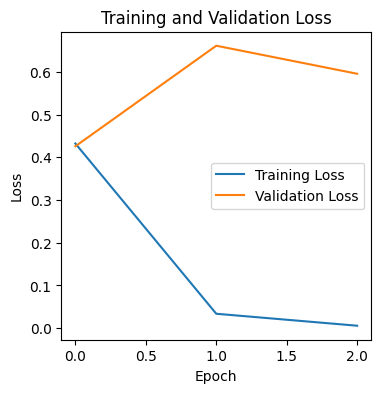

In [20]:
#plot
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [30]:
import pandas as pd

models = {
    "Logistic Regression (TF-IDF)": LogisticRegression(max_iter=500, n_jobs=-1, random_state=42).fit(X_train_tfidf, y_train),
    "Linear SVM (TF-IDF)": LinearSVC(random_state=42).fit(X_train_tfidf, y_train)
}

# Dictionary to store results
results = {}

def store_results(model_name, y_true, y_pred):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    results[model_name] = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred)
    }

store_results("Logistic Regression (TF-IDF)", y_test, models["Logistic Regression (TF-IDF)"].predict(X_test_tfidf))
store_results("Linear SVM (TF-IDF)", y_test, models["Linear SVM (TF-IDF)"].predict(X_test_tfidf))

store_results("LSTM", y_test, y_pred_classes)


In [31]:
results_df = pd.DataFrame(results)
print(results_df)

           Logistic Regression (TF-IDF)  Linear SVM (TF-IDF)      LSTM
Accuracy                       0.848238             0.847872  0.848238
Precision                      0.848238             0.848278  0.848238
Recall                         1.000000             0.999406  1.000000
F1                             0.917888             0.917662  0.917888
